In [0]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F


### MNIST data
The images in the MNIST dataset are 28 x 28 pixels (2 dimensional, 28 wide, 28 long) and is a grayscale image. The pixel values range from 0 to 255. 
We will first have to transform the array to a tensor.

In [0]:
# In the transforms module there is a Compose() function that allows the chaining together of operations
# 1st: Make arrays Tensors (0 - 255 -> 0 - 1 range)
# 2nd: Normalise the data (takes the 0 - 1 pixel values and converts it to a number between -1 -> +1 where 
#      values near -1 indicates the pixel is dark, to black; numbers near 1 indicate that pixel is lit up / bright)
#      We give it in first bracket a mean to use to normalise colour, width and height value; in second we give it a std dev
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5, ))
                                ])
# root = where you want the data to be saved; this is the training set so train = True; we want to download the data so download = True
# transform = what transformations do you wish to apply to the images?
training_ds = datasets.MNIST(root = "./data", train=True, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(dataset = training_ds, batch_size=100, shuffle = True)

In [0]:
def img_convert(tensor):
  # tensor has 1 colour by 28 x 28 so is 1 x 28 x 28
  # clone() creates a copy of tensor
  # we call detach() in order to call numpy()
  image = tensor.clone().detach().numpy() # converts to a numpy array
  # to plot image we want 28 x 28 x 1 shape
  image = image.transpose(1, 2, 0) # swap axis 1 for axis 0, axis 2 for axis 1, and axis 2 for axis 0 creates 28 x 28 x 1
  # De-normalise image 
  # print(image.shape)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image



(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


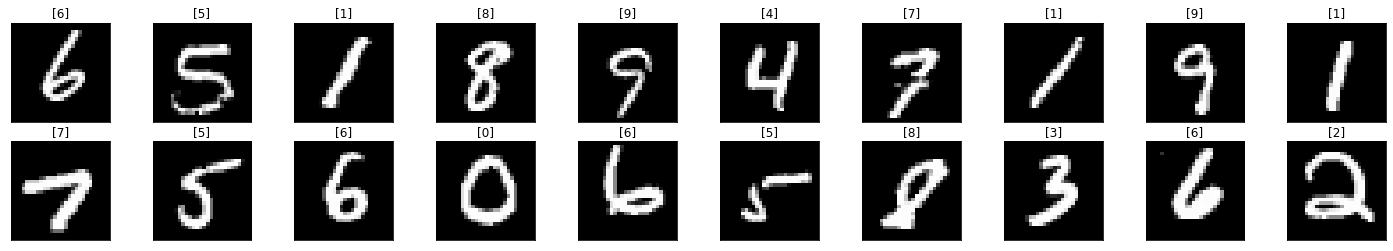

In [28]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(img_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [0]:
class Classifier(nn.Module):
    # We will have 2 hidden layers
    def __init__(self, input_size, H1, H2, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, output_size)
    def forward(self, x):
        # Let's use the relu activation function
        x = F.relu(self.linear1(x))  
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        # We are dealing with a multi class dataset so no activation function at end
        # We get the raw output of the network - score
        # nn.CrossEntropyLoss -> combination of log_softmax + NLLLoss
        # We use log probabilities
        return x

In [32]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [34]:
epochs = 12
running_loss_history = []
running_corrects_history = []
for e in range(epochs):  
  running_loss = 0.0
  running_corrects = 0.0  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    print(f'epoch : {e+1}')
    print(f'training loss: {epoch_loss:.4f}, acc {epoch_acc.item():4f}')

epoch : 1
training loss: 0.9415, acc 77.388336
epoch : 2
training loss: 0.3745, acc 89.370003
epoch : 3
training loss: 0.3120, acc 90.926666
epoch : 4
training loss: 0.2780, acc 91.996666
epoch : 5
training loss: 0.2519, acc 92.683334
epoch : 6
training loss: 0.2304, acc 93.379997
epoch : 7
training loss: 0.2124, acc 93.901665
epoch : 8
training loss: 0.1973, acc 94.356667
epoch : 9
training loss: 0.1842, acc 94.663330
epoch : 10
training loss: 0.1723, acc 95.003334
epoch : 11
training loss: 0.1619, acc 95.285004
epoch : 12
training loss: 0.1529, acc 95.566666


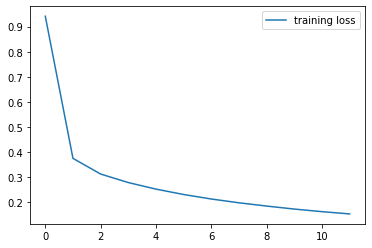

In [35]:
plt.plot(running_loss_history, label='training loss')
plt.legend()

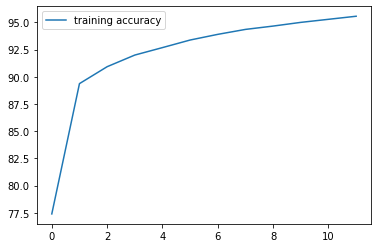

In [36]:
plt.plot(running_corrects_history, label='training accuracy')
plt.legend()